In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ScanResultsDF = pd.read_csv("Parameterscan_N=64_T=200.csv", index_col=False)

ScanResultsBottom = np.load("Results_Bottom_N=64_T=200.npy")
ScanResultsTop = np.load("Results_Top_N=64_T=200.npy")
c_scan = np.round(np.load("c_scan_N=64_T=200.npy"),2)
r_scan = np.round(np.load("r_scan_N=64_T=200.npy"),2)


# Flipping this (because I am an idiot)
ScanResultsBottom = np.flip(ScanResultsBottom, 0)
ScanResultsTop = np.flip(ScanResultsTop, 0)
c_scan = np.flip(c_scan, 0)
# r_scan is depicted correctly in the plots


In [3]:
ScanResultsDF

,c,r,Clust_Top,Clust_Bottom
0,0.00,0.00,NaN,1.000000
1,0.00,0.05,0.280488,0.334146
2,0.00,0.10,0.268293,0.380488
3,0.00,0.15,0.241463,0.414634
4,0.00,0.20,0.278049,0.314634
...,...,...,...,...
815,0.95,1.80,0.824390,0.934146
816,0.95,1.85,0.807317,0.912195
817,0.95,1.90,0.807317,0.914634
818,0.95,1.95,0.770732,0.921951


## Bottom Clustering

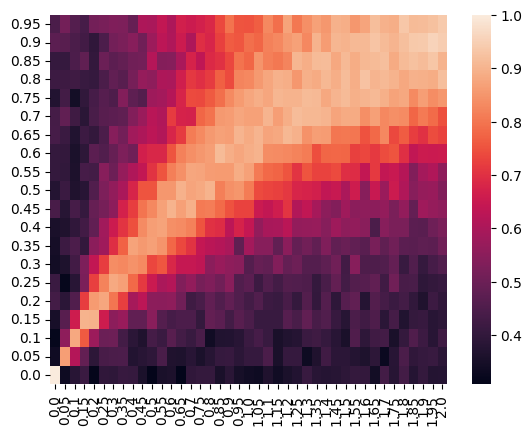

In [4]:
ax = sns.heatmap(ScanResultsBottom, linewidth=0.,  # Plot the upper few %
                 cbar=True, # colour bar on the right
                 xticklabels = r_scan,
                 yticklabels = c_scan)

## Top Clustering

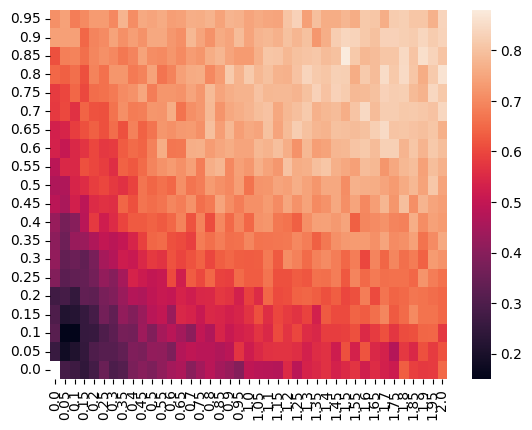

In [5]:
ax = sns.heatmap(ScanResultsTop, linewidth=0.,  # Plot the upper few %
                 cbar=True, # colour bar on the right
                 xticklabels = r_scan,
                 yticklabels = c_scan)

## Both

In [6]:
clusts = np.array(list(ScanResultsTop.flatten()) + list(ScanResultsBottom.flatten()))
clusts = clusts[~np.isnan(clusts)]
min(clusts)

0.14878048780487804

In [7]:
r_scan
[str(r) for r in r_scan ]
r_label = ['0.0',
 '',
 '',
 '',
 '',
 '0.25',
 '',
 '',
 '',
 '',
 '0.50',
 '',
 '',
 '',
 '',
 '0.75',
 '',
 '',
 '',
 '',
 '1.0',
 '',
 '',
 '',
 '',
 '1.25',
 '',
 '',
 '',
 '',
 '1.5',
 '',
 '',
 '',
 '',
 '1.75',
 '',
 '',
 '',
 '',
 '2.0']

In [8]:
c_label = ['0',
 '',
 '0.1',
 '',
 '',
 '',
 '0.3',
 '',
 '',
 '',
 '0.5',
 '',
 '',
 '',
 '0.7',
 '',
 '',
 '',
 '0.9',
 '']

In [9]:
c_label

['0',
 '',
 '0.1',
 '',
 '',
 '',
 '0.3',
 '',
 '',
 '',
 '0.5',
 '',
 '',
 '',
 '0.7',
 '',
 '',
 '',
 '0.9',
 '']

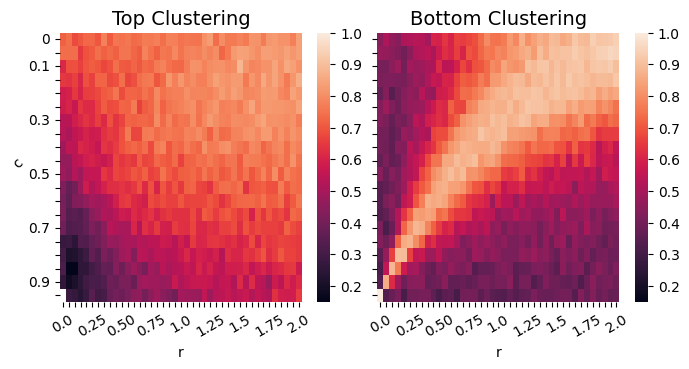

In [22]:

fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey = True,figsize = (8,3.5))
fig.subplots_adjust(wspace=0.05)




sns.heatmap(ScanResultsTop, linewidth=0.,  # Plot the upper few %
                 cbar=True, # colour bar on the right
                 xticklabels = r_scan,
                 yticklabels = c_scan,
                 vmin = min(clusts), vmax = 1,
                 ax=ax1 )

sns.heatmap(ScanResultsBottom, linewidth=0.,  # Plot the upper few %
                 cbar=True, # colour bar on the right
                 xticklabels = r_scan,
                 yticklabels = c_scan,
                 vmin = min(clusts), vmax = 1,
                 ax=ax2)

#ax1.tick_params(left=False, bottom=False,labelleft = False ,labelbottom = False) ## other options are right and top
#ax2.tick_params(left=False, bottom=False,labelleft = False ,labelbottom = False) ## other options are right and top

ax1.set_ylabel("Relative Cost c")
ax1.set_xlabel("Relative Gr")
ax2.set_xlabel("r")

ax1.set_yticklabels(c_label)
ax1.set_xticklabels(r_label)


ax1.tick_params(axis='x', rotation=30)
ax2.tick_params(axis='x', rotation=30)

fig.subplots_adjust(wspace=0.05)
plt.savefig("Clustering_Parameter_Scan_untitled.pdf",dpi = 100, bbox_inches="tight")

ax1.set_title("Top Clustering", fontsize = 14)
ax2.set_title("Bottom Clustering", fontsize = 14)

plt.savefig("Clustering_Parameter_Scan.pdf",dpi = 100, bbox_inches="tight")
plt.show()